In [1]:
from pylab import rcParams
rcParams['figure.figsize'] = 10,7

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
master=pd.read_csv('master.csv')
master.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [4]:
master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [5]:
df_master= master[['country','year','sex','age','suicides_no','population']]
df_master.head()

,country,year,sex,age,suicides_no,population
0,Albania,1987,male,15-24 years,21,312900
1,Albania,1987,male,35-54 years,16,308000
2,Albania,1987,female,15-24 years,14,289700
3,Albania,1987,male,75+ years,1,21800
4,Albania,1987,male,25-34 years,9,274300


In [104]:
master_barh = df_master.sort_values('suicides_no', ascending=False).head(1000)
master_barh

,country,year,sex,age,suicides_no,population
20996,Russian Federation,1994,male,35-54 years,22338,19044200
21008,Russian Federation,1995,male,35-54 years,21706,19249600
21080,Russian Federation,2001,male,35-54 years,21262,21476420
21068,Russian Federation,2000,male,35-54 years,21063,21378098
21057,Russian Federation,1999,male,35-54 years,20705,21016400
...,...,...,...,...,...,...
26657,United Kingdom,2000,male,35-54 years,1357,8459117
21194,Russian Federation,2010,female,55-74 years,1354,16921727
13436,Japan,1991,male,75+ years,1354,2311000
9386,France,2010,male,75+ years,1354,2081818


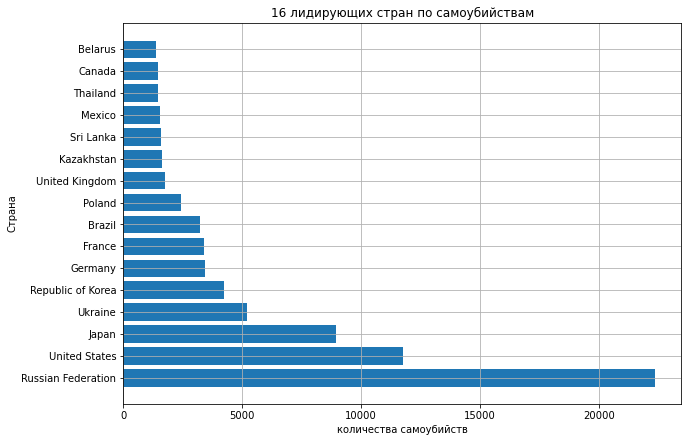

In [105]:
plt.barh(master_barh['country'], master_barh['suicides_no'])
plt.xlabel('количества самоубийств')
plt.ylabel('Страна')
plt.title('16 лидирующих стран по самоубийствам')
plt.grid()

In [92]:
master_dynamics = master.groupby('year').mean()

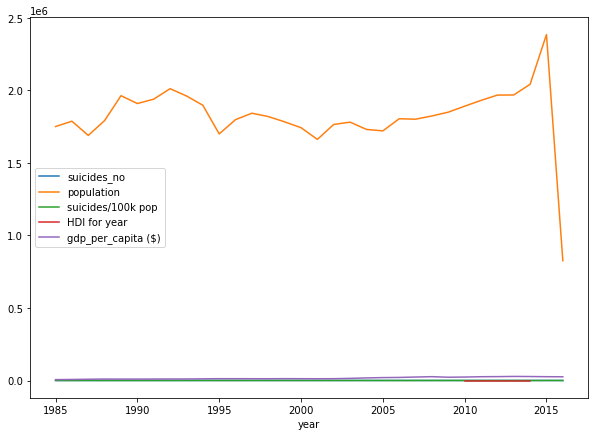

In [93]:
master_dynamics.plot()

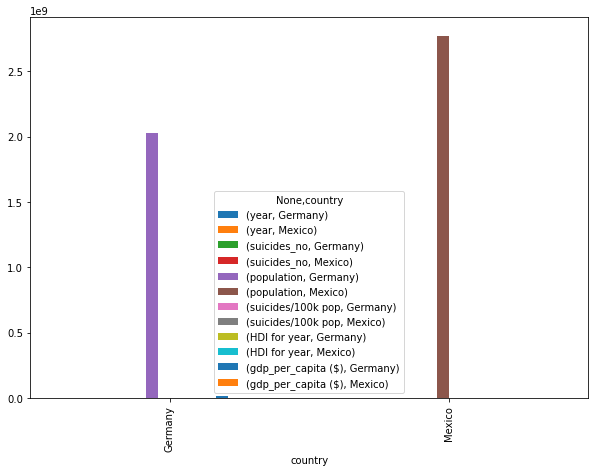

In [94]:
master_dynamics = master.groupby([master.country,'country']).sum()
master_dynamics = master_dynamics.loc[(master_dynamics.index.get_level_values(0).isin(['Germany', 'Mexico']))]
master_dynamics.unstack().plot(kind='bar')

# Вывод: из графика можно заметить, что в Мексике численность населения выше, а значит самоубийств меньше, чем в Германии.

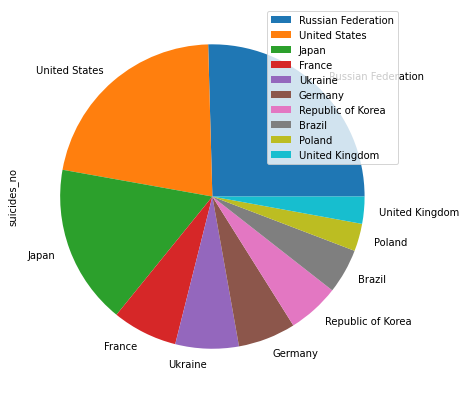

In [95]:
master_dynamics = master.groupby(['country']).sum().sort_values(by='suicides_no', ascending=False).head(10)
master_dynamics.plot(kind='pie', y='suicides_no')

# Вывод: по круговой диаграмме заметен "отрыв" России от остальных стран, что говорит о том, что почти 1/4 всех самоубийств происходит в Российской Федерации. На 2 месте США, Япония на 3 месте.

(Построим boxplot распределения длин имен в 2017 году.) Данное распределение невозможно применить к выбранным данным.

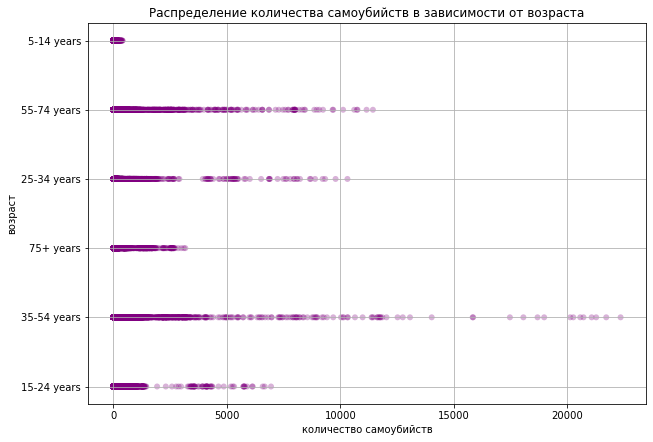

In [119]:
suicides_no = df_master.suicides_no
age = df_master.age

fig,ax = plt.subplots()
ax.scatter(suicides_no, age,c='purple',alpha=0.3,edgecolors='none')
ax.grid(True)
plt.xlabel('количество самоубийств')
plt.ylabel('возраст')
plt.title('Распределение количества самоубийств в зависимости от возраста')
plt.show()

# Вывод: на данном графике представлено распределение количества самоубийств в зависимости от возраста. Из данной зависимости видим, что большинство самоубийств совершается в возрасте от 35-54 лет. Наименьший уровень самоубийств совершается в возрасте 75+ лет.

In [115]:
import seaborn as sns

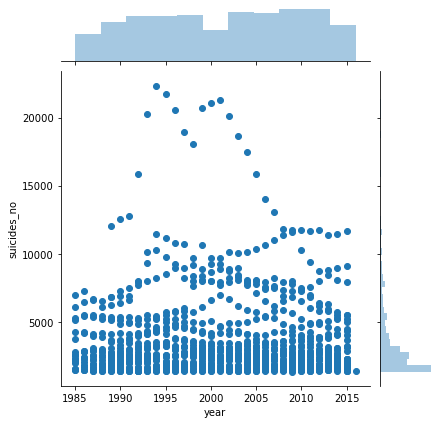

In [118]:
sns.jointplot(x='year', y='suicides_no', 
              data=master_barh, kind='scatter')

# Вывод: Скорее всего плохой год не сказывается на самоубийствах людей, сказывается неудовлетворенность жизнью. Из графика заметно одинаковое распределение независимо от года.